(555, 383)
(555, 383)
RGB
L


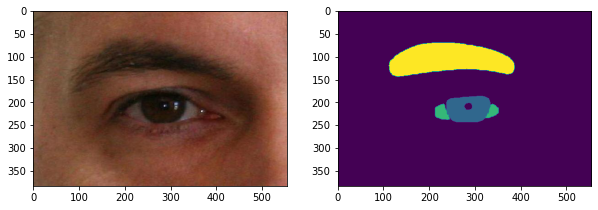

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = Image.open('/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice/ubiris_peculiar(jpg)/C1_S1_I1_L.jpg')
# mask = Image.open("/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris/ubiris_peculiar(png)/C1_S1_I1_L.png")
mask = Image.open("/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice/ubiris_peculiar(png)/C1_S1_I1_L.png")


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask)

print(image.size)
print(mask.size)
# print(type(image))
print(image.mode)
print(mask.mode)

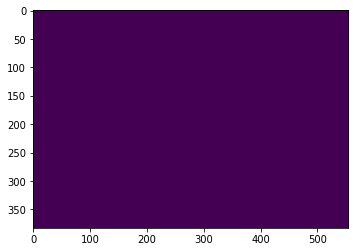

In [45]:
w,h = image.size
zeros = np.zeros(shape=(h,w))
plt.imshow(zeros)

In [46]:
numpy_image = np.array(mask)
# print(numpy_image[100][200])
# print(numpy_image[230][220])
# print(numpy_image[230][250])

pixel_eyelid = 255
pixel_conjunctiva = 170
pixel_iris = 85

print("眉：", pixel_eyelid) 
print("結膜(白目):", pixel_conjunctiva)
print("虹彩：", pixel_iris) 

眉： 255
結膜(白目): 170
虹彩： 85


In [47]:
list_iris = list(zip(*np.where(numpy_image == pixel_iris)))
list_conjunctiva = list(zip(*np.where(numpy_image == pixel_conjunctiva)))
print(len(list_iris))
print(len(list_conjunctiva))

print(list_iris[0])
print(list_conjunctiva[0])

4521
1291
(187, 303)
(204, 229)


In [48]:
for i in range(len(list_iris)):
    y,x = list_iris[i]
    zeros[y][x] = int(1)

for i in range(len(list_conjunctiva)):
    y,x = list_conjunctiva[i]
    zeros[y][x] = int(2)

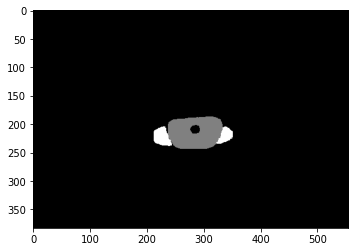

In [49]:
plt.imshow(zeros, cmap="gray")

L


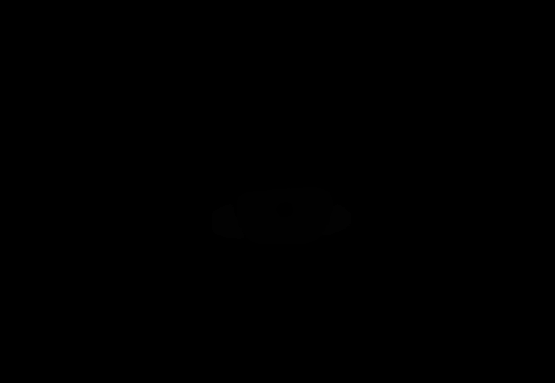

In [50]:
pil_image = Image.fromarray(zeros)
pil_image = pil_image.convert("L")
print(pil_image.mode)
pil_image

In [51]:
path = "/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice_2"
pil_image.save(path + "/sample.png" )

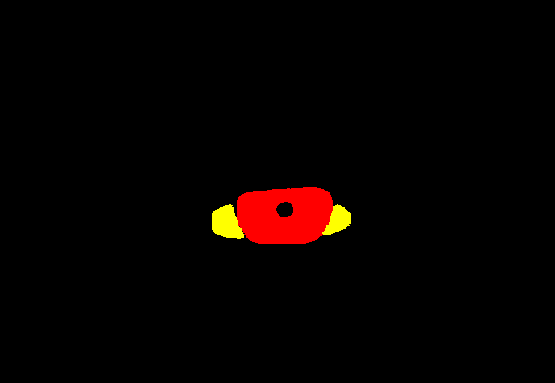

In [52]:
pil_image.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red　←RGBの具体的な値ではなくカラーパレットのIDが格納されている！だから視覚的には、真っ黒にしか見えない。
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
])
pil_image

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob
import os

path_rgb = "/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice/ubiris_peculiar(jpg)"
path_anno = "/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice/ubiris_peculiar(png)"
rgb_files = glob.glob(path_rgb+"/*")
anno_files = glob.glob(path_anno+"/*")

pixel_eyelid = 255
pixel_conjunctiva = 170
pixel_iris = 85

print(rgb_files[0])
print("眉：", pixel_eyelid) 
print("結膜(白目):", pixel_conjunctiva)
print("虹彩：", pixel_iris) 

def creat_iris(image, list_iris):
    for i in range(len(list_iris)):
        y,x = list_iris[i]
        image[y][x] = int(1)    
    return image

def creat_conjunctiva(image, list_conjunctiva):
    for i in range(len(list_conjunctiva)):
        y,x = list_conjunctiva[i]
        image[y][x] = int(2) 
    return image

/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice/ubiris_peculiar(jpg)/C1_S1_I10_L.jpg
眉： 255
結膜(白目): 170
虹彩： 85


In [75]:
path_anno_2 = "/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice_2/ubiris_peculiar(png)"

for i in range(len(rgb_files)):
# for i in range(10):
    rgb_path = rgb_files[i]
    anno_path = anno_files[i]
    # print("rgb_path:", rgb_path)
    # print("anno_path", anno_path)
    
    basename = os.path.basename(anno_path)
    rgb_image = Image.open(rgb_path)
    anno_image = Image.open(anno_path)
    numpy_image = np.array(anno_image)
    
    
    w,h = rgb_image.size
    zeros = np.zeros(shape=(h,w))

    # print("basename, w, h:", basename, w, h)
    
    list_iris = list(zip(*np.where(numpy_image == pixel_iris)))
    list_conjunctiva = list(zip(*np.where(numpy_image == pixel_conjunctiva)))
    
    zeros = creat_iris(zeros, list_iris)
    zeros = creat_conjunctiva(zeros, list_conjunctiva)

    image = Image.fromarray(zeros)
    image = image.convert("L")
    
    image.save(path_anno_2 + "/" +basename)

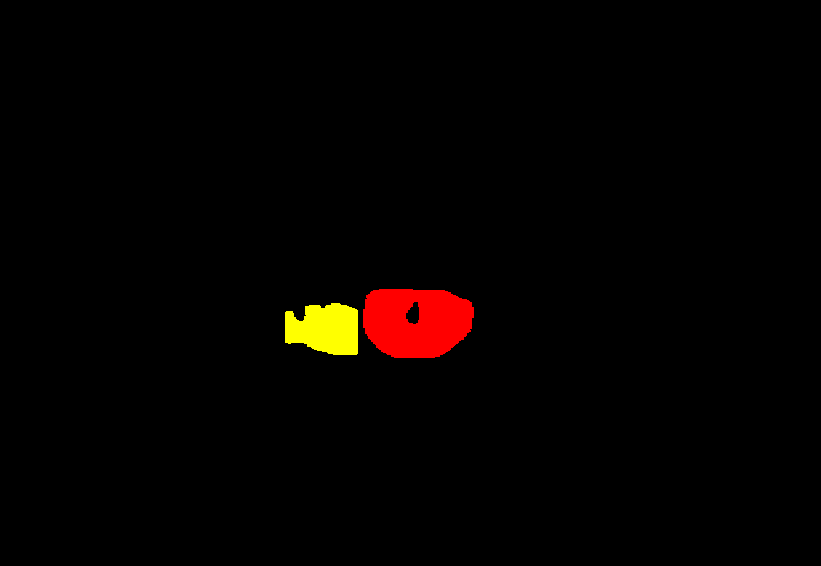

In [76]:
image.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red　←RGBの具体的な値ではなくカラーパレットのIDが格納されている！だから視覚的には、真っ黒にしか見えない。
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
])

image

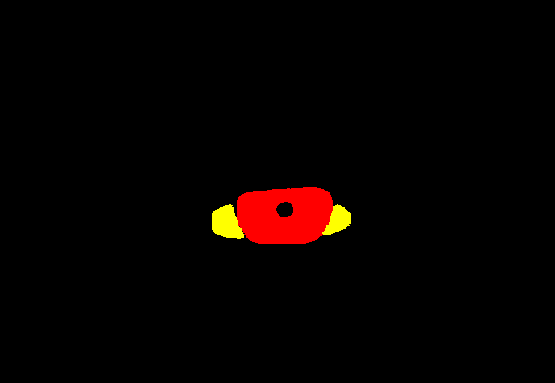

In [77]:
path = "/mnt/c/Users/kokun/Desktop/Project/tutorial_mask_rcnn_pytorch/datasets/ubiris_practice_2/ubiris_peculiar(png)/C1_S1_I1_L.png"
image = Image.open(path)

image.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red　←RGBの具体的な値ではなくカラーパレットのIDが格納されている！だから視覚的には、真っ黒にしか見えない。
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
])

image